# EMRI Waveforms in Fourier Domain
Here we show how the plots of the paper have been produced

In [13]:
import sys, time, h5py,os
import matplotlib
import scienceplots
import numpy as np
import matplotlib.pyplot as plt

import corner
from FDutils import *

import matplotlib as mpl

default_width = 5.78853 # in inches
default_ratio = (np.sqrt(5.0) - 1.0) / 2.0 # golden mean

mpl.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": 'pdflatex',
    "pgf.rcfonts": False,
    "font.family": "serif",
    "figure.figsize": [default_width, default_width * default_ratio],
})

In [14]:
# define the injection parameters
M = 1e6 # central object mass
a = 0.1  # will be ignored in Schwarzschild waveform
mu = 10.0 # secondary object mass
p0 = 12.0 # initial semi-latus rectum
e0 = 0.6 # eccentricity

x0 = 1.0  # will be ignored in Schwarzschild waveform
qK = np.pi/3  # polar spin angle
phiK = np.pi/3  # azimuthal viewing angle
qS = np.pi/3  # polar sky angle
phiS = np.pi/3  # azimuthal viewing angle
dist = 1.0  # distance
# initial phases
Phi_phi0 = np.pi/3
Phi_theta0 = 0.0
Phi_r0 = np.pi/3

Tobs = 1.0 # observation time, if the inspiral is shorter, the it will be zero padded 
dt = 10.0 # time interval
eps = 1e-2 # mode content percentage

## Import results

In [41]:
# fontsize label
fs_lab = 18
# legend
fs_leg = 14
# ticks
fs_ticks = 14

In [42]:
files = ['results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt5.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5',
 'results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt10.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5',
'results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt5.0_eps0.01_fixedInsp1_tot_numb10000_newsens.h5',
 'results/mismatch_speed_analysis/emri_T2.0_seed2601996_dt5.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5'
]

In [43]:
files

['results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt5.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5',
 'results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt10.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5',
 'results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt5.0_eps0.01_fixedInsp1_tot_numb10000_newsens.h5',
 'results/mismatch_speed_analysis/emri_T2.0_seed2601996_dt5.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5']

In [44]:
# define variables
speed_td = []
speed_fd = []
speed_fd_downsampled = []
injection_pars = []
dt_T_eps = []
mismatch = []
# blackman, hann, nuttall
mismatch_windowed_b = []
mismatch_windowed_h = []
mismatch_windowed_n = []
mismatch_windowed = []
SNR = []

for ff in files:
    print("importing results from ",ff)
    dset = h5py.File(ff,'r')
    speed_td.append(dset['timing_td'][:5000])
    speed_fd.append(dset['timing_fd'][:5000,0])
    speed_fd_downsampled.append(dset['timing_fd'][:5000,1])
    
    SNR.append(dset['SNR'][:5000])
    injection_pars.append(dset['list_injections'][:5000])
    mismatch.append(dset['mismatch'][:5000,0])
    mismatch_windowed_b.append(dset['mismatch'][:5000,1])
    mismatch_windowed_h.append(dset['mismatch'][:5000,2])
    mismatch_windowed_n.append(dset['mismatch'][:5000,3])
    dt_T_eps.append([dset['dt'][...], dset['T'][...], dset['eps'][...] ])
    dset.close()

linest = ['-',':', '--', '-.',]

importing results from  results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt5.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5
importing results from  results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt10.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5
importing results from  results/mismatch_speed_analysis/emri_T4.0_seed2601996_dt5.0_eps0.01_fixedInsp1_tot_numb10000_newsens.h5
importing results from  results/mismatch_speed_analysis/emri_T2.0_seed2601996_dt5.0_eps1e-05_fixedInsp1_tot_numb10000_newsens.h5


In [45]:
ii = 0
xfit, yfit = np.log10(mismatch_windowed_h[ii]),np.log10(speed_td[ii]/speed_fd[ii])
ind = np.argsort(xfit)
xfit = xfit[ind]
yfit = yfit[ind]
c = np.polynomial.polynomial.polyfit(xfit,yfit, 1, rcond=None, full=False)
xx = np.linspace( xfit.min(), xfit.max() )

0.5172269520769357


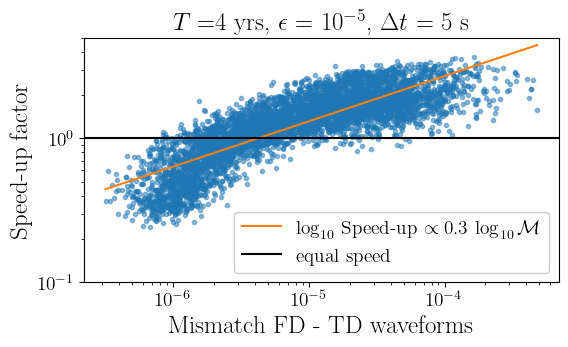

In [46]:
plt.figure()
plt.title(fr'$T = ${int(dt_T_eps[ii][1])} yrs, $\epsilon$ = ${as_si(dt_T_eps[ii][2],0)}$, $\Delta t$ = {int(dt_T_eps[ii][0])} s',fontsize=fs_lab)
for ii in range(1):
    plt.loglog(mismatch_windowed_h[ii],speed_td[ii]/speed_fd[ii],'.',alpha=0.5)
    print(np.corrcoef(mismatch_windowed_h[ii],speed_td[ii]/speed_fd[ii])[0,1] )
plt.plot(10**xx,10**(c[0] + c[1] * xx ) , label='$\log_{10}$ Speed-up $\propto 0.3 \, \log_{10} \mathcal {M}$')
plt.xlabel('Mismatch FD - TD waveforms',fontsize=fs_lab)
plt.ylabel('Speed-up factor',fontsize=fs_lab)
plt.axhline(1.0,label='equal speed',color='k')
plt.ylim([0.1, 5])
plt.legend(loc='lower right',framealpha=1.0, fontsize=fs_leg)
plt.xticks(fontsize=fs_ticks)
plt.yticks(fontsize=fs_ticks)
plt.tight_layout()
plt.savefig('figures/speedup_mismatch.pdf')

[-6.497710448863318, -6.838389602883775, -6.497813456427775, -6.741589354498262]


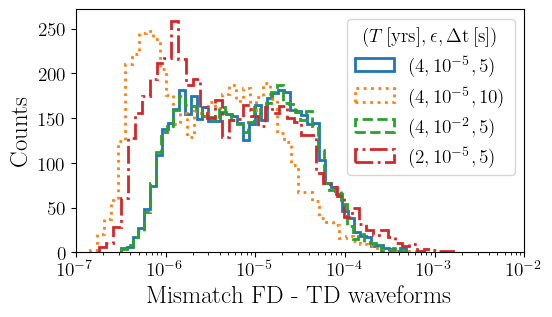

In [114]:
plt.figure()
[plt.hist(speed,histtype='step', 
          bins=np.logspace(np.log10((speed).min()),np.log10((speed).max())), 
#         bins=np.logspace(-7,-2), 
          label=f'$({int(el[1])},{as_si(el[2],0)},{int(el[0])})$',
          density=False,
          linewidth=2.0, linestyle=ls) 
         for speed,el,ls in zip(mismatch_windowed_h,dt_T_eps,linest)]
print([np.log10(speed.min())       for speed,el,ls in zip(mismatch_windowed_h,dt_T_eps,linest)])
plt.xlabel('Mismatch FD - TD waveforms',fontsize=fs_lab)
plt.ylabel('Counts',fontsize=fs_lab)
# plt.yticks([])

leg = plt.legend(fontsize=fs_leg,loc='upper right',ncol=1)
leg.set_title(r'$(T \, [\rm{yrs}], \epsilon,\Delta t \,[\rm{s}])$', prop={'size': fs_leg})
plt.xticks(fontsize=fs_ticks)
plt.yticks(fontsize=fs_ticks)
plt.semilogx()
plt.xlim(1e-7, 1e-2)
# plt.ylim(0.0, 500)

# plt.ticklabel_format(axis='y', style='sci', scilimits=(0,8))
# ax.set_aspect(figsize_std[0]*enlarge*1.75/(figsize_std[1]*enlarge))

plt.subplots_adjust(bottom=0.2) # or whatever
plt.savefig('figures/mismatch_different_systems_windowed_hann.pdf')


In [115]:
print("95 %",[np.quantile(speed,0.95) for speed,el in zip(mismatch_windowed_h,dt_T_eps)])
print("medians",[np.quantile(speed,0.5) for speed,el in zip(mismatch_windowed_h,dt_T_eps)])

for speed,pp in zip(mismatch_windowed_h,injection_pars):
    print(np.max(speed))
    print("worst par",pp[np.argmax(speed)][0], pp[np.argmax(speed)][1]/pp[np.argmax(speed)][0], pp[np.argmax(speed)][3], pp[np.argmax(speed)][4])
    

95 % [7.78422790154776e-05, 4.1386006036464615e-05, 7.433787577475483e-05, 9.743289071686985e-05]
medians [7.719051220544948e-06, 2.8893325352274957e-06, 7.585231295903494e-06, 4.087138271657853e-06]
0.0004816409249511766
worst par 9992906.141310893 1.131355551500033e-06 7.060600096664631 0.19801820863315006
0.0008723507617848236
worst par 110742.99558533158 1.0276193666573734e-06 11.504912867278867 0.6922233995838277
0.0004618427813817272
worst par 9992906.141310893 1.131355551500033e-06 7.060600096664631 0.19801820863315006
0.0015844408491736406
worst par 9725312.170038152 1.1723423181071835e-06 7.040119975952709 0.3005824824925789


In [116]:
for speed,pp,snr in zip(mismatch_windowed_h,injection_pars,SNR):
    print(np.max(speed * snr[:,2]))
    print("worst par",pp[np.argmax(speed * snr[:,2])][0], pp[np.argmax(speed * snr[:,2])][1]/pp[np.argmax(speed * snr[:,2])][0],
          pp[np.argmax(speed * snr[:,2])][3], pp[np.argmax(speed * snr[:,2])][4])


0.005060231280595914
worst par 3670041.7362535275 7.9579017824785e-05 13.709101864726545 0.5794130830706371
0.0027733470016856384
worst par 3670041.7362535275 7.9579017824785e-05 13.709101864726545 0.5794130830706371
0.004639490049006459
worst par 3670041.7362535275 7.9579017824785e-05 13.709101864726545 0.5794130830706371
0.008080697827686157
worst par 4730594.114158897 6.032268240752218e-06 8.273899574470173 0.5052184585979977


In [117]:
var=0
ii=0
for var in [0,1,3,4]:
    print(np.corrcoef([injection_pars[ii][:,var], mismatch_windowed_h[ii]])[0,1] )

0.7219149902412278
0.2318646969671873
-0.4285781232157949
-0.09774800379208937


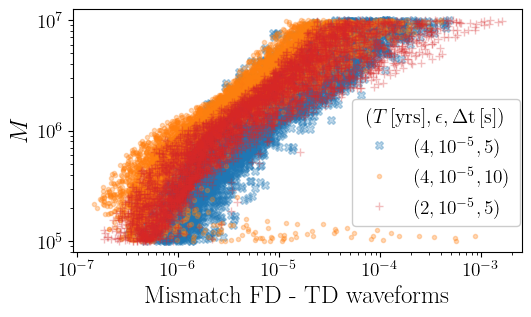

In [163]:
lab = ['$M$', '$\mu$', ' ','$p_0$','$e_0$', ]

var = 0
mark = ['X','.','o','+']
cmap = plt.cm.get_cmap('tab10')

enlarge = 1.0
plt.figure()
[plt.loglog(mismatch_windowed_h[ii],injection_pars[ii][:,var],mark[ii],color=cmap(ii),
#             label=f'T = {int(dt_T_eps[ii][1])} yrs, $\epsilon$ = ${as_si(dt_T_eps[ii][2],0)}$, $\Delta t$ = {int(dt_T_eps[ii][0])} s',
            label=f'$({int(dt_T_eps[ii][1])},{as_si(dt_T_eps[ii][2],0)},{int(dt_T_eps[ii][0])})$',
            alpha=0.3) for ii in [0,1,3]]
plt.xlabel('Mismatch FD - TD waveforms',fontsize=fs_lab)
plt.ylabel(lab[var],fontsize=fs_lab)

leg = plt.legend(fontsize=fs_leg,bbox_to_anchor=[0.6, 0.37], ncol=1,framealpha=0.99)
leg.set_title(r'$(T \, [\rm{yrs}], \epsilon,\Delta t \,[\rm{s}])$', prop={'size': fs_lab*0.8})
plt.xticks(fontsize=fs_ticks)
plt.yticks(fontsize=fs_ticks)
plt.subplots_adjust(bottom=0.2) # or whatever

plt.savefig('figures/mismatch_mass_different_systems_windowed_hann.pdf')

[]

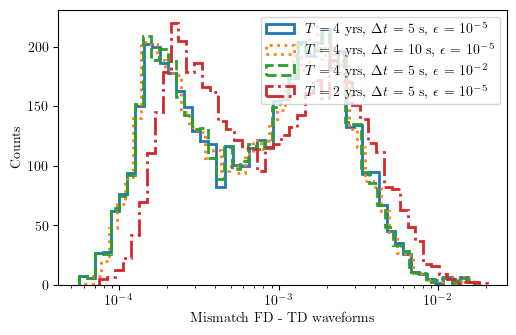

In [149]:
plt.figure(figsize=(figsize_std[0]*enlarge,figsize_std[1]*enlarge))
[plt.hist(speed,histtype='step', 
          bins=np.logspace(np.log10((speed).min()),np.log10((speed).max())), 

          label=f'$T = {int(el[1])}$ yrs, $\Delta t$ = {int(el[0])} s, $\epsilon$ = ${as_si(el[2],0)}$',density=False,
          linewidth=2.0, linestyle=ls) 
         for speed,el,ls in zip(mismatch,dt_T_eps,linest)]

plt.xlabel('Mismatch FD - TD waveforms')
plt.ylabel('Counts')
# plt.yticks([])
plt.legend()
plt.semilogx()
# plt.tight_layout()
# plt.savefig('figures/mismatch_different_systems_nowindowed.pdf')

[]

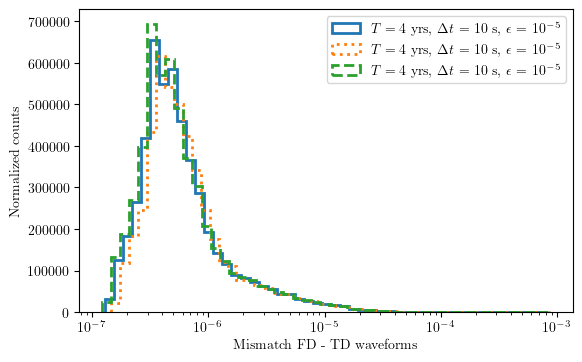

In [150]:
ii=1
enlarge = 1.1
plt.figure(figsize=(figsize_std[0]*enlarge,figsize_std[1]*enlarge))
[plt.hist(speed,histtype='step', bins=np.logspace(np.log10((speed).min()),np.log10((speed).max())), 
          label=f'$T = {int(dt_T_eps[ii][1])}$ yrs, $\Delta t$ = {int(dt_T_eps[ii][0])} s, $\epsilon$ = ${as_si(dt_T_eps[ii][2],0)}$',density=True,
          linewidth=2.0, linestyle=ls) 
         for speed,ls in zip([mismatch_windowed_b[ii],mismatch_windowed_h[ii], mismatch_windowed_n[ii]],linest)]

plt.xlabel('Mismatch FD - TD waveforms')
plt.ylabel('Normalized counts')
# plt.yticks([])
plt.legend()
plt.semilogx()
# plt.ticklabel_format(axis='y', style='sci', scilimits=(0,8))
# plt.tight_layout()
# plt.savefig('figures/mismatch_different_systems_windowed_hann.pdf')



[]

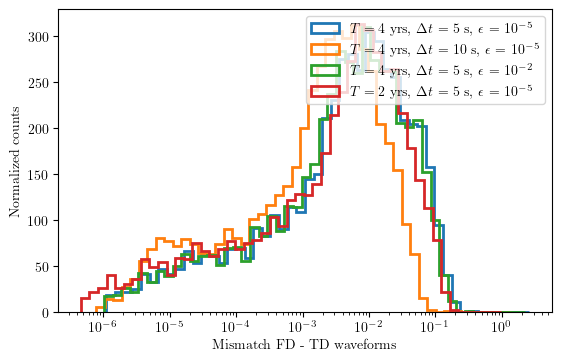

In [151]:
plt.figure(figsize=(figsize_std[0]*enlarge,figsize_std[1]*enlarge))
[plt.hist(speed*snr[:,2]**2,histtype='step', bins=np.logspace(np.log10((speed*snr[:,0]**2).min()),np.log10((speed*snr[:,0]**2).max())), 
          label=f'$T = {int(el[1])}$ yrs, $\Delta t$ = {int(el[0])} s, $\epsilon$ = ${as_si(el[2],0)}$',density=False,
          linewidth=2.0, linestyle='-') 
         for speed,el,snr in zip(mismatch_windowed_h,dt_T_eps,SNR)]

plt.xlabel('Mismatch FD - TD waveforms')
plt.ylabel('Normalized counts')
plt.legend()
plt.semilogx()

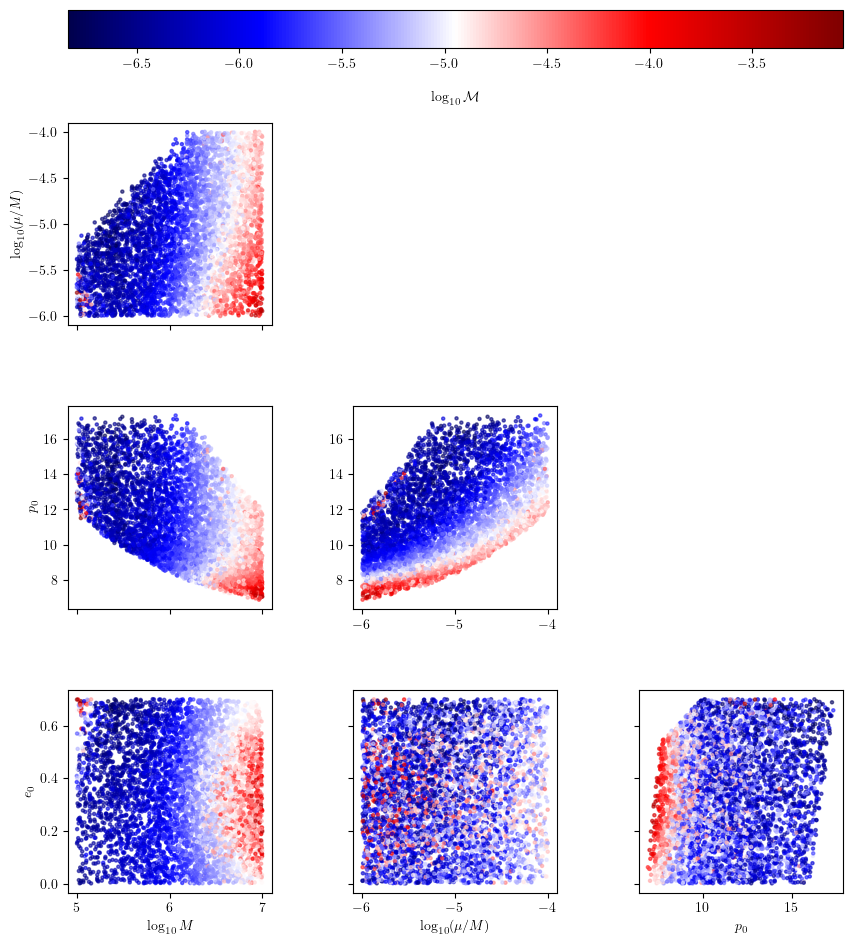

-6.838389602883775 -3.059308855345315


In [153]:
ii = 1
data_in = injection_pars[ii][:,[0,1,3,4]]
data_in[:,1] = np.log10(data_in[:,1]/data_in[:,0])
data_in[:,0] = np.log10(data_in[:,0])
get_colorplot(data_in, np.log10(mismatch_windowed_h[ii]),  ['$\log_{10}M$', '$\log_{10}(\mu/M)$','$p_0$','$e_0$'],'$\log_{10} \mathcal{M}$')
print(np.log10(mismatch_windowed_h[ii]).min(), np.log10(mismatch_windowed_h[ii]).max())

# ii = 3
# data_in = injection_pars[ii][:,[0,1,3,4]]
# data_in[:,1] = np.log10(data_in[:,1]/data_in[:,0])
# data_in[:,0] = np.log10(data_in[:,0])
# get_colorplot(data_in, np.log10(mismatch_windowed_h[ii]),  ['$\log_{10}M$', '$\log_{10}(\mu/M)$','$p_0$','$e_0$'],'$\log_{10} \mathcal{M}$')
# print(np.log10(mismatch_windowed_h[ii]).min(), np.log10(mismatch_windowed_h[ii]).max())


## Worst point in parameter space

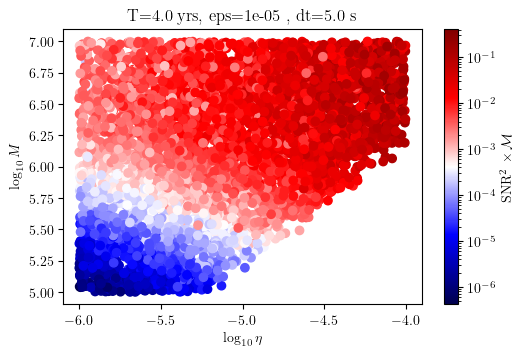

In [154]:
ii = 0
# Generate random data
x = np.log10(injection_pars[ii][:,1]/injection_pars[ii][:,0])
y = np.log10(injection_pars[ii][:,0])
z = SNR[ii][:,2]**2 * mismatch_windowed_h[ii]#mismatch_windowed_h[ii] # 

# Define color scheme
cmap = plt.get_cmap('seismic')
colors = cmap(z)

# Plot scatter plot with colormap and color bar
fig, ax = plt.subplots()
plt.title(f'T={dt_T_eps[ii][1]} yrs, eps={dt_T_eps[ii][2]} , dt={dt_T_eps[ii][0]} s')
plt.scatter(x, y, c=z, cmap=cmap, norm=matplotlib.colors.LogNorm())
plt.colorbar(label=r'SNR$^2 \, \times \mathcal{M}$')

# Set axis labels and title
ax.set_xlabel('$\log_{10} \eta$')
ax.set_ylabel('$\log_{10} M$')
# ax.set_title('Speed up as a function of the parameter spac')

# Show the plot
# plt.tight_layout()
plt.show()

In [155]:
# worst Mismatch times SNR^2
ind = np.argsort(z)[-1:]
print("parameters ",[el for el in injection_pars[ii][ind][0][[0,1,3,4]] ])
print("snr = ",SNR[ii][ind,2],"mismatch", mismatch_windowed_h[ii][ind] )
# worst Mismatch 
z = mismatch_windowed_h[ii]
ind = np.argsort(z)[-1:]
print("parameters ",[el for el in injection_pars[ii][ind][0][[0,1,3,4]] ])
print("snr = ",SNR[ii][ind,2],"mismatch", mismatch_windowed_h[ii][ind] )

parameters  [3670041.7362535275, 292.0583167470244, 13.709101864726545, 0.5794130830706371]
snr =  [81.76166353] mismatch [6.18900235e-05]
parameters  [9992906.141310893, 11.305529838590854, 7.060600096664631, 0.19801820863315006]
snr =  [2.25763117] mismatch [0.00048164]


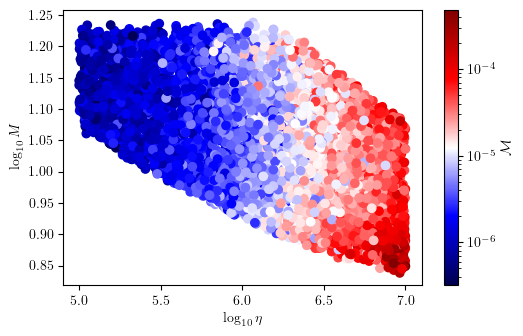

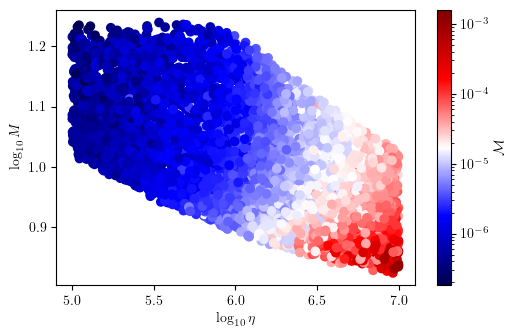

In [156]:
ii = 1
for ii in [0,3]:
    # Generate random data
#     x = np.log10(injection_pars[ii][:,1]/injection_pars[ii][:,0])
    x = np.log10(injection_pars[ii][:,0])
    y = np.log10(injection_pars[ii][:,3])
    z = mismatch_windowed_h[ii]#mismatch_windowed_h[ii] # 

    # Define color scheme
    cmap = plt.get_cmap('seismic')
    colors = cmap(z)

    # Plot scatter plot with colormap and color bar
    fig, ax = plt.subplots()
    # plt.title(f'SNR for T={dt_T_eps[ii][1]} yrs, eps={dt_T_eps[ii][2]} , dt={dt_T_eps[ii][0]} s')
    plt.scatter(x, y, c=z, cmap=cmap, norm=matplotlib.colors.LogNorm())
    plt.colorbar(label='$\mathcal{M}$')

    # Set axis labels and title
    ax.set_xlabel('$\log_{10} \eta$')
    ax.set_ylabel('$\log_{10} M$')
    # ax.set_title('Speed up as a function of the parameter spac')

    # Show the plot
    # plt.tight_layout()
    # plt.savefig('figures/mass_massratio_SNR.pdf')

# Speed analysis

In [157]:
var=0
ii=2
for var in [0,1,3,4]:
    print(np.corrcoef([injection_pars[ii][:,var], speed_td[ii]/speed_fd[ii]])[0,1] )

0.3731186944024771
0.21991936739308787
-0.3270543318593017
0.2403529349057511


median [1.3551724305260222, 1.0638856983731886, 0.8909406267921309, 1.2023531279084492]


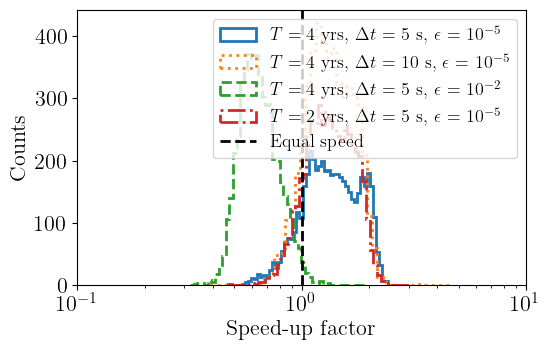

In [159]:
enlarge = 1.7
plt.figure()
[plt.hist(sptd/spfd, bins=np.logspace(np.log10((sptd/spfd).min()),np.log10((sptd/spfd).max())),
          linewidth=2.0,linestyle=ls,
          histtype='step', label=f'$T = {int(el[1])}$ yrs, $\Delta t$ = {int(el[0])} s,  $\epsilon$ = ${as_si(el[2],0)}$',density=False)
 for spfd,sptd,el,ls in zip(speed_fd_downsampled,speed_td,dt_T_eps,linest)]

plt.axvline(1.0,color='k',label='Equal speed',linestyle='--',linewidth=2.0,)
plt.xlabel('Speed-up factor',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.legend(loc='upper right',fontsize=13)
plt.semilogx()
plt.xlim([1e-1, 10])
plt.tick_params(axis='both', labelsize=16)

plt.savefig('figures/speed_different_systems_downsampled.pdf')

print("median",[np.quantile(sptd/spfd,0.5) for spfd,sptd,el in zip(speed_fd,speed_td,dt_T_eps)])

In [160]:
# open dataset
dset = h5py.File("results/mismatch_speed_analysis/emri_T2.0_seed2601996_dt10.0_eps0.01_fixedInsp1_tot_numb1000_CPU_newsens.h5",'r')
speed_td_cpu = dset['timing_td'][:500]
speed_fd_cpu = dset['timing_fd'][:500,0]
speed_fd_downsampled_cpu = dset['timing_fd'][:500,1]
dt_T_eps_cpu = [dset['dt'][...], dset['T'][...], dset['eps'][...] ]
dset.close()

median [1.3551724305260222, 1.0638856983731886, 0.8909406267921309, 1.2023531279084492]


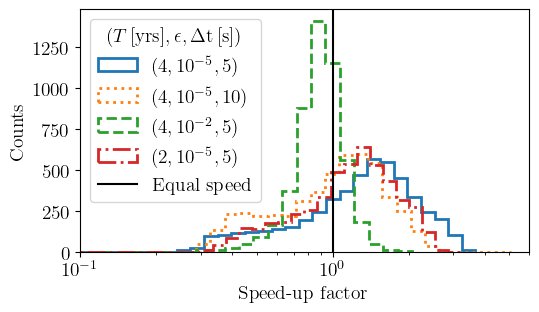

In [165]:
enlarge = 1.5
plt.figure()
[plt.hist(sptd/spfd, 
          bins=np.logspace(np.log10((sptd/spfd).min()),np.log10((sptd/spfd).max())),
          linewidth=2.0,linestyle=ls,
          histtype='step', 
#           label=f'$T = {int(el[1])}$ yrs, $\epsilon$ = ${as_si(el[2],0)}$, $\Delta t$ = {int(el[0])} s',
          label=f'$({int(el[1])},{as_si(el[2],0)},{int(el[0])})$',
          density=False)
 for spfd,sptd,el,ls in zip(speed_fd,speed_td,dt_T_eps,linest)]

# gpuratio = speed_td_cpu /speed_fd_cpu
# plt.hist(gpuratio, 
#   bins=np.logspace(np.log10((gpuratio).min()),np.log10((gpuratio).max()),num=20),
#   linewidth=2.0,linestyle=(0, (1, 1)),
#   histtype='step', weights=np.ones_like(gpuratio)*5000/500,
# label=f'$T = {int(dt_T_eps_cpu[1])}$ yrs, $\epsilon$ = ${as_si(dt_T_eps_cpu[2],0)}$, $\Delta t$ = {int(dt_T_eps_cpu[0])} s, CPU',density=False)
    


plt.axvline(x=1.0,ymin=0,ymax=1.76, color='k',label='Equal speed',linestyle='-',linewidth=1.5)
plt.xlabel('Speed-up factor',fontsize=fs_ticks)
plt.ylabel('Counts',fontsize=fs_ticks)

leg = plt.legend(fontsize=fs_leg,loc='upper left',ncol=1)
leg.set_title(r'$(T \, [\rm{yrs}], \epsilon,\Delta t \,[\rm{s}])$', prop={'size': fs_leg})

plt.semilogx()
plt.xlim([1e-1,6])
# plt.ylim([0, 2500])
plt.tick_params(axis='both', labelsize=fs_ticks)
plt.subplots_adjust(bottom=0.2) # or whatever

# ax.set_aspect(figsize_std[0]*enlarge*1.75/(figsize_std[1]*enlarge))
# plt.tight_layout()
plt.savefig('figures/speed_different_systems.pdf',pad_inches=0.1)

print("median",[np.quantile(sptd/spfd,0.5) for spfd,sptd,el in zip(speed_fd,speed_td,dt_T_eps)])

[]

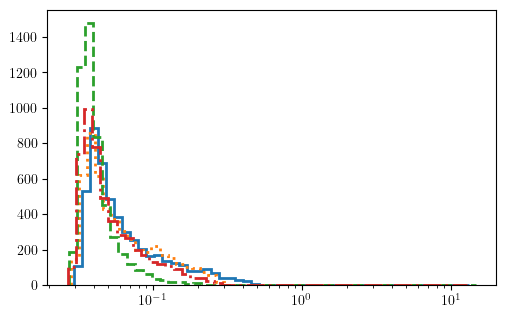

In [166]:
[plt.hist(spfd, 
          bins=np.logspace(np.log10((spfd).min()),np.log10((spfd).max())),
          linewidth=2.0,linestyle=ls,
          histtype='step', label=f'$T = {int(el[1])}$ yrs, $\Delta t$ = {int(el[0])} s,  $\epsilon$ = ${as_si(el[2],0)}$',density=False)
 for spfd,sptd,el,ls in zip(speed_fd,speed_td,dt_T_eps,linest)]
plt.semilogx()

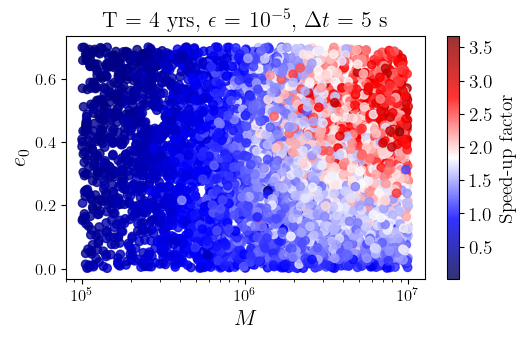

In [168]:
ii = 0
# Generate random data
x = injection_pars[ii][:,0]
y = injection_pars[ii][:,4]
z = speed_td[ii]/speed_fd[ii]

# Define color scheme
cmap = plt.get_cmap('seismic')
colors = cmap(z)

enlarge = 1.
# Plot scatter plot with colormap and color bar
fig, ax = plt.subplots()
plt.title(fr'T = {int(dt_T_eps[ii][1])} yrs, $\epsilon$ = ${as_si(dt_T_eps[ii][2],0)}$, $\Delta t$ = {int(dt_T_eps[ii][0])} s',fontsize=16)

plt.scatter(x, y, c=z, cmap=cmap,alpha=0.8)
cbar = plt.colorbar(label='TD speed / FD speed')#,labelsize=16)
cbar.ax.set_ylabel('Speed-up factor', fontsize=14)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(14)

# plt.colorbar(label='log10 Mismatch')

# Set axis labels and title
ax.set_xlabel('$M$',fontsize=16)
ax.set_ylabel('$e_0$',fontsize=16)
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_title('Speed up as a function of the parameter spac')
plt.tick_params(axis='both', labelsize=12)
plt.subplots_adjust(bottom=0.2) # or whatever
# Show the plot
# ax.set_aspect(figsize_std[0]*enlarge*1.75/(figsize_std[1]*enlarge))
# plt.tight_layout()
plt.savefig('figures/mass_ecc_speedup.pdf')


In [169]:
# get_colorplot(data_in, speed_td[ii]/speed_fd[ii],  ['$\log_{10}M$', '$\log_{10}(\mu/M)$','$p_0$','$e_0$'],'TD speed / FD speed')

[]

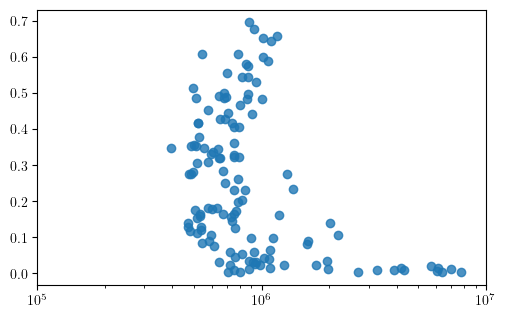

In [170]:
def find_regions(x, y, z, threshold):
    regions = []
    for i in range(len(x)):
        if (z[i] > threshold)and(z[i] < threshold*(1.05)):
            regions.append((x[i], y[i]))
    return regions

region = np.asarray(find_regions(x,y,z,1.0))

plt.figure()
plt.scatter(region[:,0], region[:,1],alpha=0.8)
plt.xlim([1e5,1e7])
plt.semilogx()

## Posterior comparison

In [173]:
sys.path.append('../Eryn/')
from eryn.backends import HDFBackend
import h5py, glob

In [174]:
def get_autocorr_plot(to_check):
    n_dim  = to_check.shape[-1]
    plt.figure()
    for var in range(n_dim):
        y = to_check[:,:,var].T
        # Compute the estimators for a few different chain lengths
        N = np.exp(np.linspace(np.log(100), np.log(y.shape[1]), 10)).astype(int)
        gw2010 = np.empty(len(N))
        new = np.empty(len(N))
        for i, n in enumerate(N):
            gw2010[i] = autocorr_gw2010(y[:, :n])
            new[i] = autocorr_new(y[:, :n])

        # Plot the comparisons
        # plt.loglog(N, gw2010, "o-", label="G&W 2010")
        plt.loglog(N, new, "o-", label=f"new var{var}")

    plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
    # plt.axhline(true_tau, color="k", label="truth", zorder=-100)
    plt.xlabel("number of samples, $N$")
    plt.ylabel(r"$\tau$ estimates")
    plt.legend(fontsize=14);
    plt.show()



In [175]:
datasets = glob.glob('results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD*window_flagTrue*.h5')
datasets
# samp.shape

['results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatetd_window_flagTrue.h5',
 'results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatefd_window_flagTrue.h5',
 'results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD1_usegpuTrue_templatefd_window_flagTrue.h5']

results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatetd_window_flagTrue.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.50905284, 0.50951127, 0.50775789, 0.5092088 , 0.50867475,
        0.50978539, 0.5083203 , 0.50987518, 0.5096247 , 0.50811235,
        0.50954436, 0.51073533, 0.5090812 , 0.50851879, 0.51056047,
        0.50900558, 0.51039978, 0.50965306, 0.50894887, 0.50807454,
        0.51083458, 0.50881181, 0.50916154, 0.50905284, 0.50983265,
        0.50649602, 0.50761611, 0.50875037, 0.50903394, 0.50887798,
        0.50898195, 0.50757357]])}}


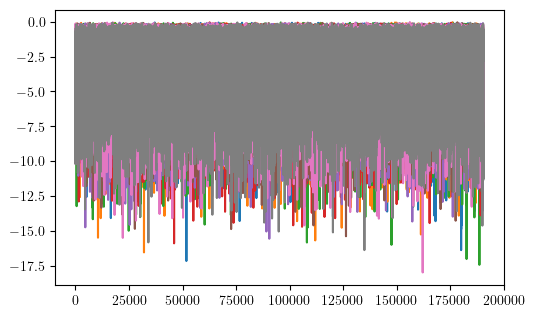

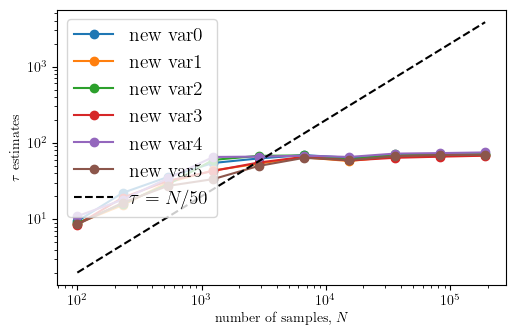

results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatefd_window_flagTrue.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.5093838 , 0.50940066, 0.50616875, 0.50934445, 0.50931635,
        0.51005829, 0.51024939, 0.50814162, 0.51007515, 0.50844514,
        0.50788869, 0.5081641 , 0.50693316, 0.5098166 , 0.51026625,
        0.50960301, 0.50901283, 0.50824279, 0.50813038, 0.50737158,
        0.51063722, 0.50913649, 0.5062924 , 0.50687134, 0.50819783,
        0.50838893, 0.50903532, 0.50999646, 0.50894538, 0.50877114,
        0.50955242, 0.50995149]])}}


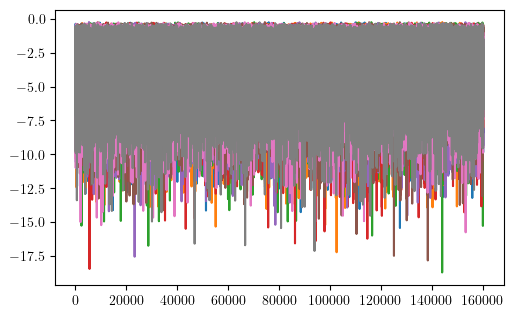

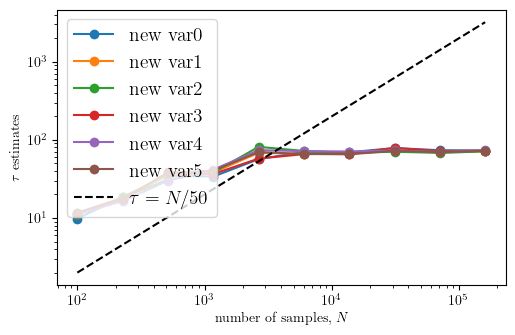

results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD1_usegpuTrue_templatefd_window_flagTrue.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.50836938, 0.50677976, 0.50577431, 0.5053418 , 0.50962197,
        0.50928495, 0.50758861, 0.50606078, 0.50879065, 0.50739763,
        0.5064315 , 0.5084087 , 0.50693142, 0.50792001, 0.50746503,
        0.50841431, 0.50564512, 0.50665056, 0.50879065, 0.50645959,
        0.50679661, 0.50792563, 0.50857159, 0.50814469, 0.50694265,
        0.50644835, 0.50828512, 0.50800989, 0.51156547, 0.50703814,
        0.50744257, 0.50712801]])}}


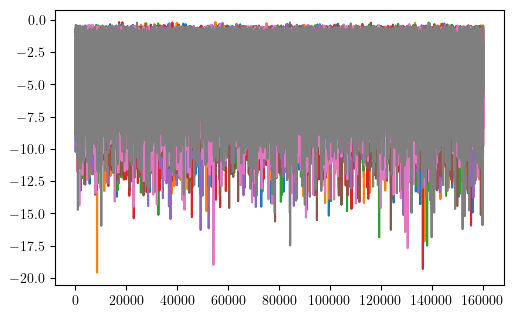

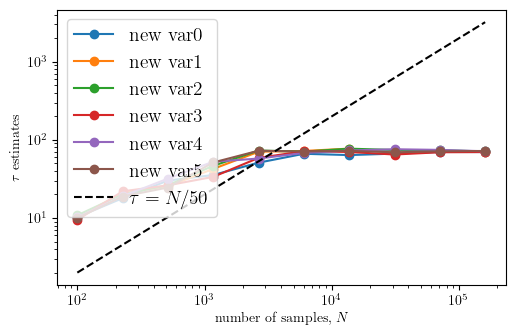

In [176]:
# filename = 'emri_M1e+06_mu1e+01_p9.5_e0.35_T1.0_eps1e-05_seed2601996_injectFD1_templatefd.h5'
temp=0

samp_final = []
for filename in datasets:
    file  = HDFBackend(filename)
    print(filename)
    print(file.get_move_info())
    max_iter = file.iteration
    burn = int(max_iter*0.1)
    thin = 1
    ll = file.get_log_like(discard=burn, thin=thin)
    mask = np.arange(8)#[file.get_move_info()['StretchMove_0']['acceptance_fraction'][0]>0.1]
    plt.figure()
    [plt.plot(ll[:,temp,walker],'-',label=f'{walker}') for walker in mask]
    plt.show()
    
    # get samples
    samp = file.get_chain(discard=burn, thin=thin)['emri'][:,temp,mask,...]
    get_autocorr_plot(samp[:,:,0,:])
    logl = ll[:,temp,mask,...]

    inds = file.get_inds(discard=burn, thin=thin)['emri']
    samp_final.append( np.hstack((samp[inds[:,temp,mask,...]],logl[inds[:,temp,mask,0],None])) )

In [178]:
M,mu,p0,e0 = 3670041.7362535275, 292.0583167470244, 13.709101864726545, 0.5794130830706371
Phi_phi0 = np.pi/3
Phi_r0 = np.pi/3

truths = [
            np.log(M),  
            np.log(mu/M),
            p0,
            e0,
            Phi_phi0, 
            Phi_r0,
                0.0
        ]

CORNER_KWARGS = dict(
#     smooth=0.6,
    labels=[r'$\log M$', r'$\log (\mu / M)$', r'$p_0$', r'$e_0$', 
#             r'$D_L$',
#             r'$\cos{\theta_K}$', r'$\phi_K$',
#            r'$\cos{\theta_S}$', r'$\phi_S$',
           r'$\Phi_{\phi 0}$', r'$\Phi_{r 0}$','Log-Likelihood'
           ],
    bins=40,
    truths = truths,
    label_kwargs=dict(fontsize=13),
    title_kwargs=dict(fontsize=13),
#     quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    max_n_ticks=7,
    truth_color='k'
)
import matplotlib.lines as mlines

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)


def overlaid_corner(samples_list, sample_labels, name_save=None, corn_kw=CORNER_KWARGS):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('Set1',)
    colors = [cmap(i) for i in range(n)]#['black','red', 'royalblue']#

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)
    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        weights=get_normalisation_weight(len(samples_list[0]), max_len),
        **CORNER_KWARGS
    )

    for idx in range(1, n):
        fig = corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=25, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
#     fig.subplots_adjust(right=1.0,top=1.0)

    plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=None, hspace=0.15)

    if name_save is not None:
        plt.savefig(name_save+".pdf", pad_inches=0.2, bbox_inches='tight')
    else:
        plt.show()


In [179]:
# plt.savefig?

In [180]:
name_mcmc = [el.split('downsample1_')[-1].split('.h5')[0] for el in datasets]
name_mcmc

['results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatetd_window_flagTrue',
 'results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatefd_window_flagTrue',
 'results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD1_usegpuTrue_templatefd_window_flagTrue']

In [181]:
samp_final[0].shape

(1524088, 7)

In [182]:
name_mcmc

['results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatetd_window_flagTrue',
 'results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD0_usegpuTrue_templatefd_window_flagTrue',
 'results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps1e-05_seed2601996_nw32_nt1_downsample0_injectFD1_usegpuTrue_templatefd_window_flagTrue']

In [183]:
name_mcmc = ['TD injection, FD template',
            'TD injection, TD template',
             'FD injection, FD template',
            ]

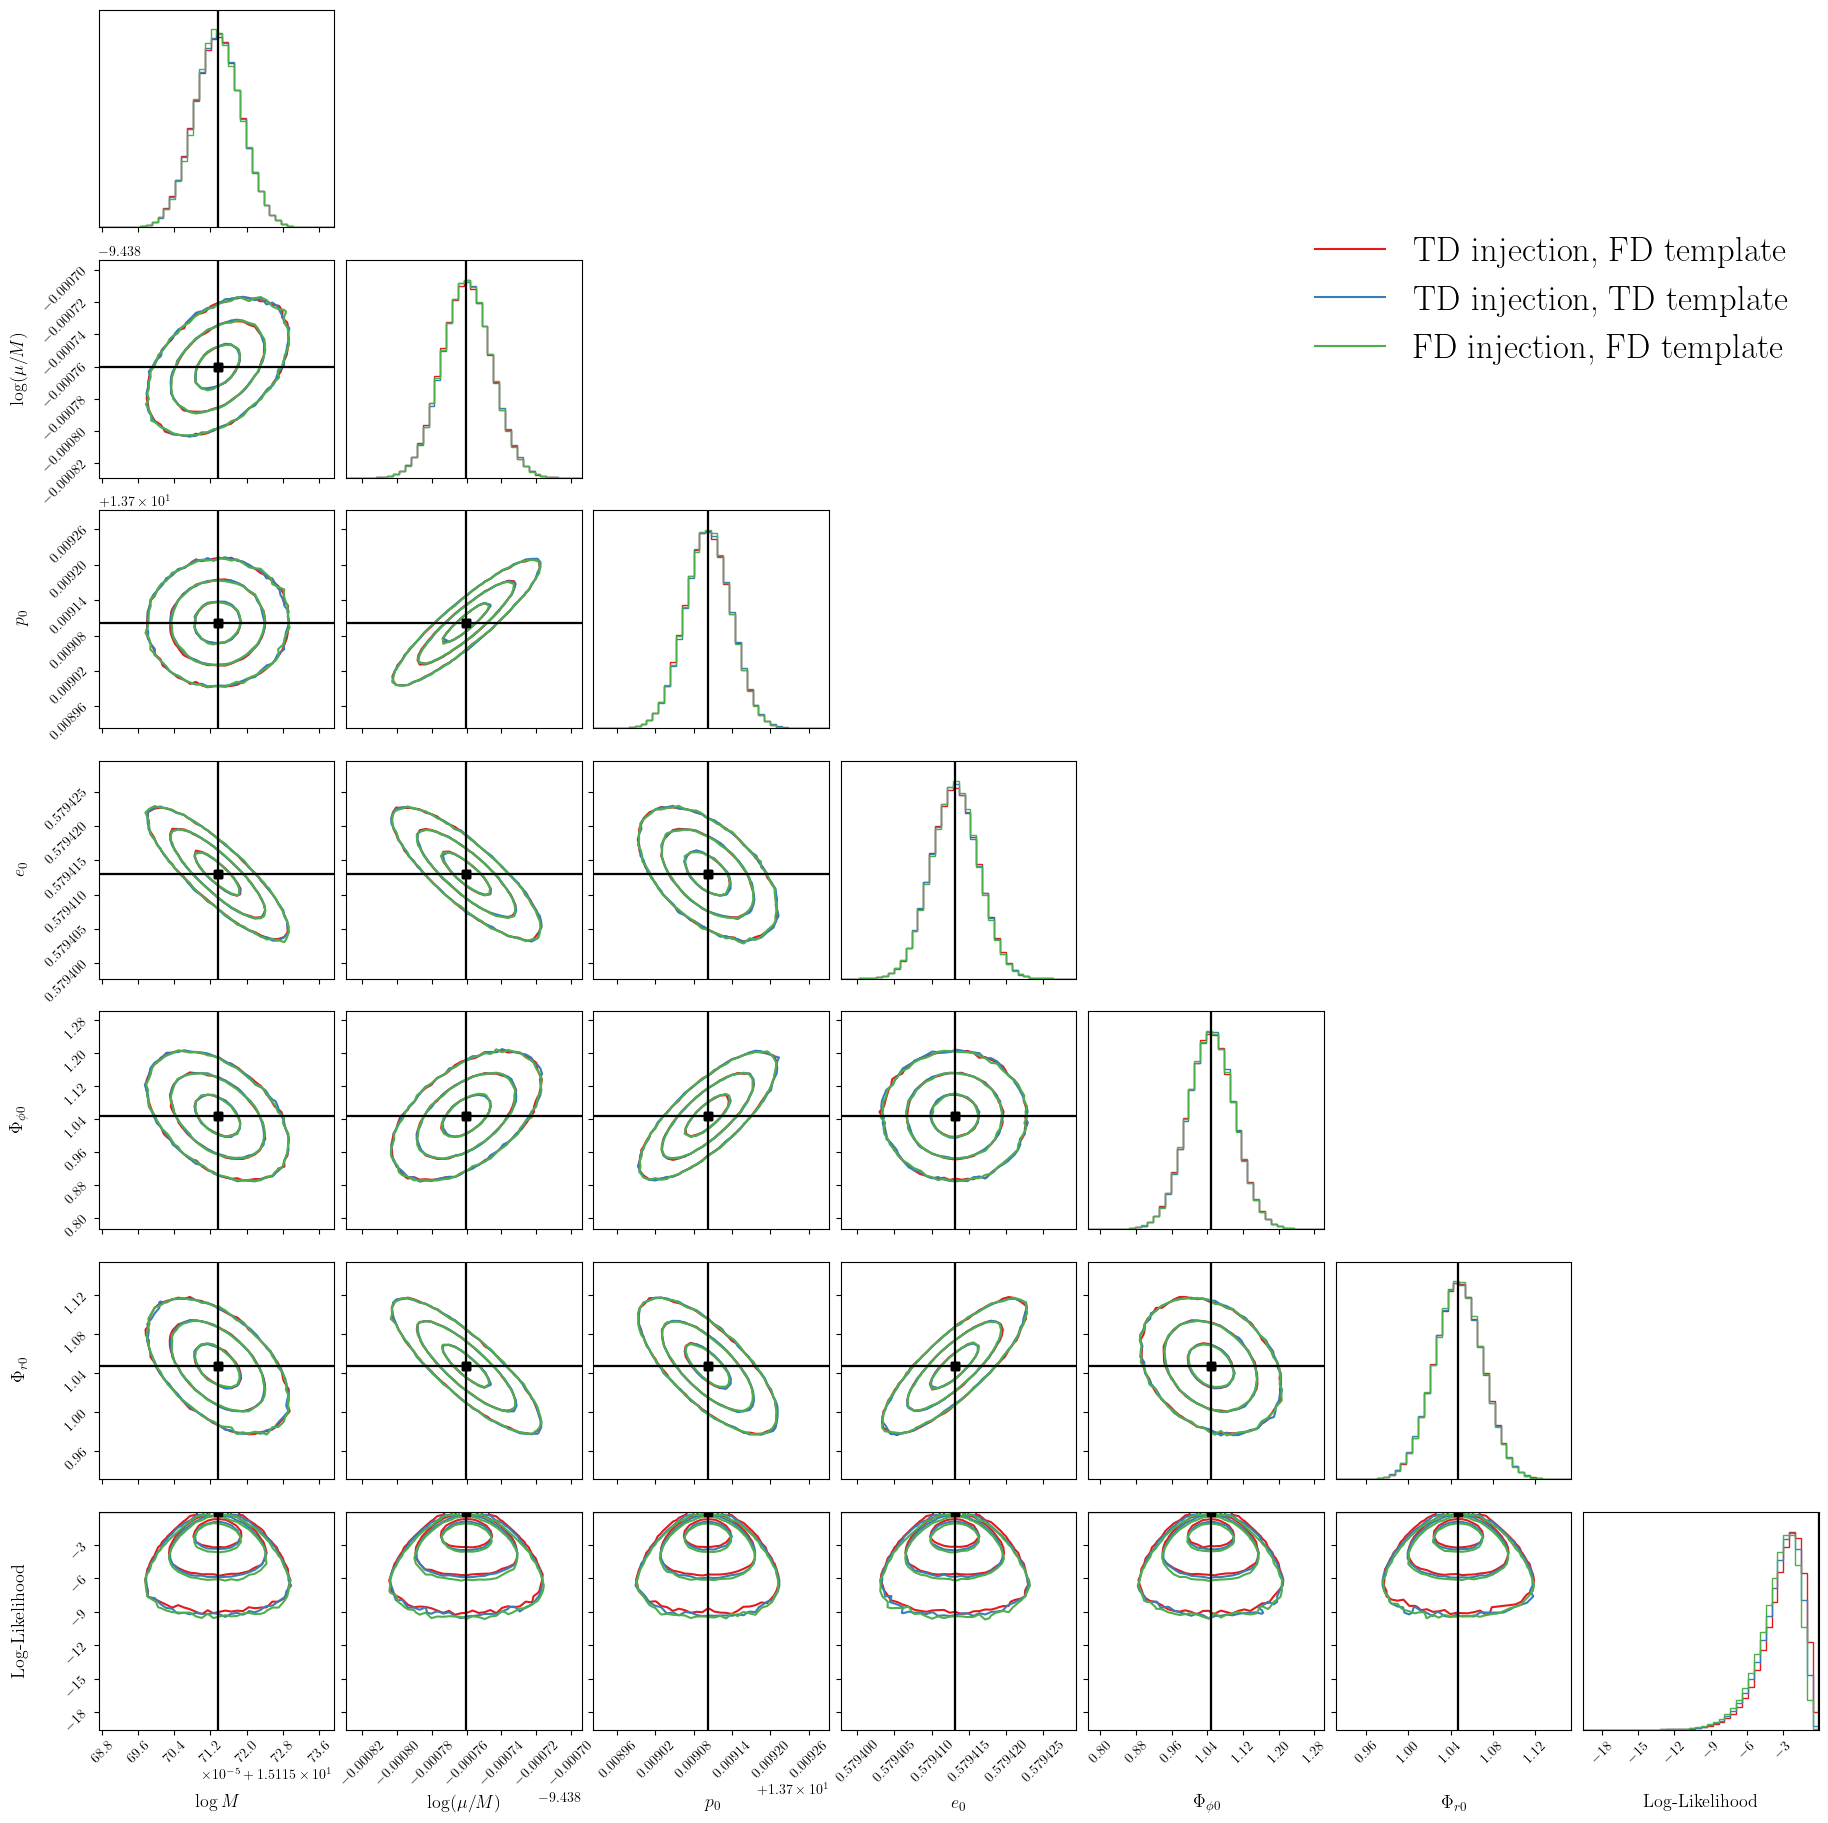

In [185]:
overlaid_corner(samp_final, name_mcmc, name_save='figures/posterior_comparison_intrinsic')

# Downsampled

In [186]:
datasets = glob.glob('results/downsampled_mcmc/*.h5')

['results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample2_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample5_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample10_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5']

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample2_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.40731214, 0.41142779, 0.41684673, 0.41170216, 0.41444593,
        0.41406866, 0.41338272, 0.40319649, 0.41235381, 0.4101245 ,
        0.41081044, 0.40991872, 0.41108482, 0.41211373, 0.40707206,
        0.40631752, 0.41053606, 0.40864972, 0.41708681, 0.41074185,
        0.40532291, 0.41022739, 0.41262819, 0.40703776, 0.40902699,
        0.40816956, 0.40762081, 0.41159927, 0.41386288, 0.4124567 ,
        0.41050177, 0.40868402],
       [0.26045204, 0.26683129, 0.25510169, 0.25997188, 0.26340158,
        0.26566519, 0.26309291, 0.26515074, 0.26731145, 0.26645402,
        0.2608979 , 0.26765442, 0.2631958 , 0.2620983 , 0.26148095,
        0.2667284 , 0.2655966 , 0.26758583, 0.26470487, 0.26175532,
        0.27187296, 0.25918304, 0.25647357, 0.2667627 , 0.26751723,
        0.25314

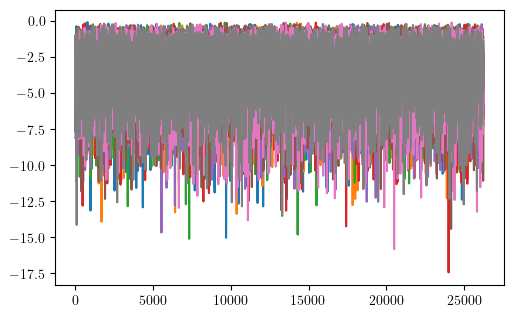

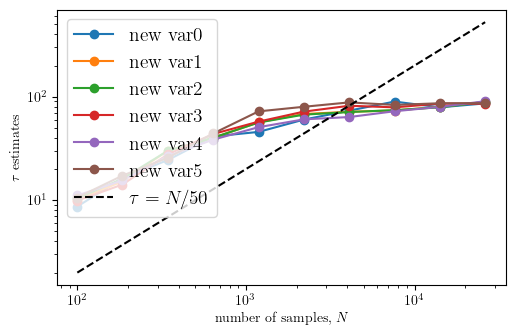

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample5_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.39952846, 0.40286292, 0.40168407, 0.4074099 , 0.40835298,
        0.40370495, 0.40912765, 0.40171775, 0.40175143, 0.40458067,
        0.40370495, 0.40222297, 0.41219266, 0.40127989, 0.40171775,
        0.39983159, 0.39865275, 0.40508589, 0.40296396, 0.40791512,
        0.40357023, 0.40357023, 0.40239138, 0.40471539, 0.40592792,
        0.40690468, 0.40309869, 0.40360391, 0.40562479, 0.40474907,
        0.40478276, 0.40407545],
       [0.25998653, 0.26658808, 0.25567531, 0.25927922, 0.26379252,
        0.26547659, 0.2631189 , 0.26497137, 0.26685753, 0.26638599,
        0.26072752, 0.26743011, 0.26379252, 0.26237791, 0.26200741,
        0.26753116, 0.26557764, 0.26759852, 0.2651061 , 0.26119906,
        0.27170765, 0.25924554, 0.25671943, 0.26652071, 0.26732907,
        0.25341

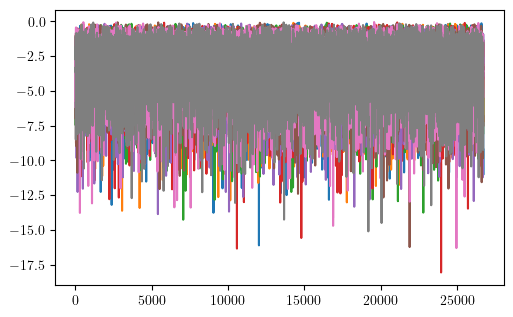

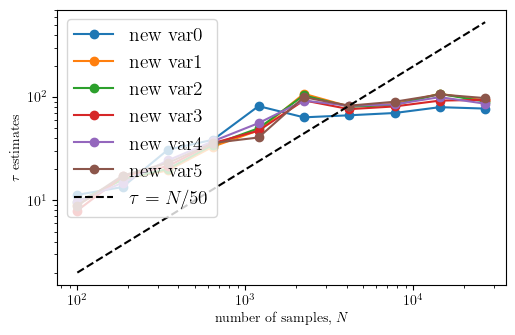

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample10_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.39442138, 0.40081704, 0.39800429, 0.40503616, 0.40379721,
        0.40403161, 0.40249129, 0.40533753, 0.39760246, 0.40443343,
        0.40396464, 0.39770292, 0.39900884, 0.40312751, 0.40617466,
        0.39894187, 0.40054916, 0.4011184 , 0.40480177, 0.40754755,
        0.39512456, 0.40011385, 0.40232387, 0.40252478, 0.39961157,
        0.40148674, 0.39475623, 0.4006831 , 0.40667694, 0.40188856,
        0.40275917, 0.40145325],
       [0.26038039, 0.26634074, 0.25559202, 0.25910796, 0.26376239,
        0.26516877, 0.26282481, 0.26480043, 0.26680954, 0.2662068 ,
        0.26064827, 0.26704393, 0.26413073, 0.26222207, 0.2617198 ,
        0.26764666, 0.26590544, 0.26751272, 0.26500134, 0.26141843,
        0.27179882, 0.25940932, 0.25673051, 0.26674257, 0.26660863,
        0.2533

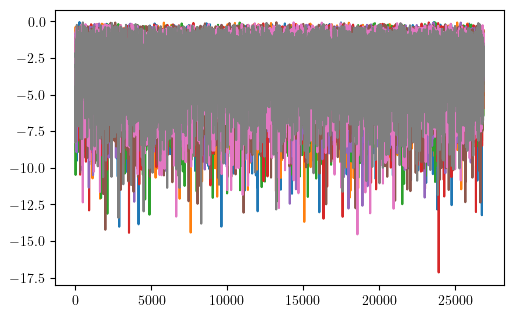

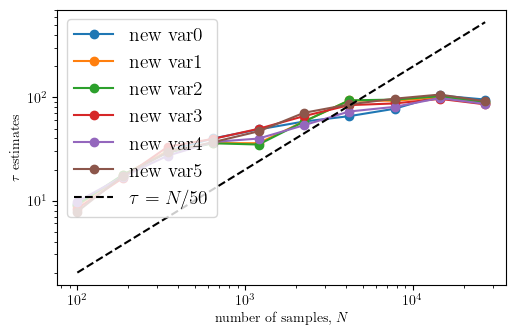

In [188]:
# filename = 'emri_M1e+06_mu1e+01_p9.5_e0.35_T1.0_eps1e-05_seed2601996_injectFD1_templatefd.h5'
temp=0

samp_final = []
for filename in datasets:
    file  = HDFBackend(filename)
    print(filename)
    print(file.get_move_info())
    max_iter = file.iteration
    burn = int(max_iter*0.1)
    thin = 1
    ll = file.get_log_like(discard=burn, thin=thin)
    mask = np.arange(8)#[file.get_move_info()['StretchMove_0']['acceptance_fraction'][0]>0.1]
    plt.figure()
    [plt.plot(ll[:,temp,walker],'-',label=f'{walker}') for walker in mask]
    plt.show()
    
    # get samples
    samp = file.get_chain(discard=burn, thin=thin)['emri'][:,temp,mask,...]
    get_autocorr_plot(samp[:,:,0,:])
    logl = ll[:,temp,mask,...]

    inds = file.get_inds(discard=burn, thin=thin)['emri']
    samp_final.append( np.hstack((samp[inds[:,temp,mask,...]],logl[inds[:,temp,mask,0],None])) )

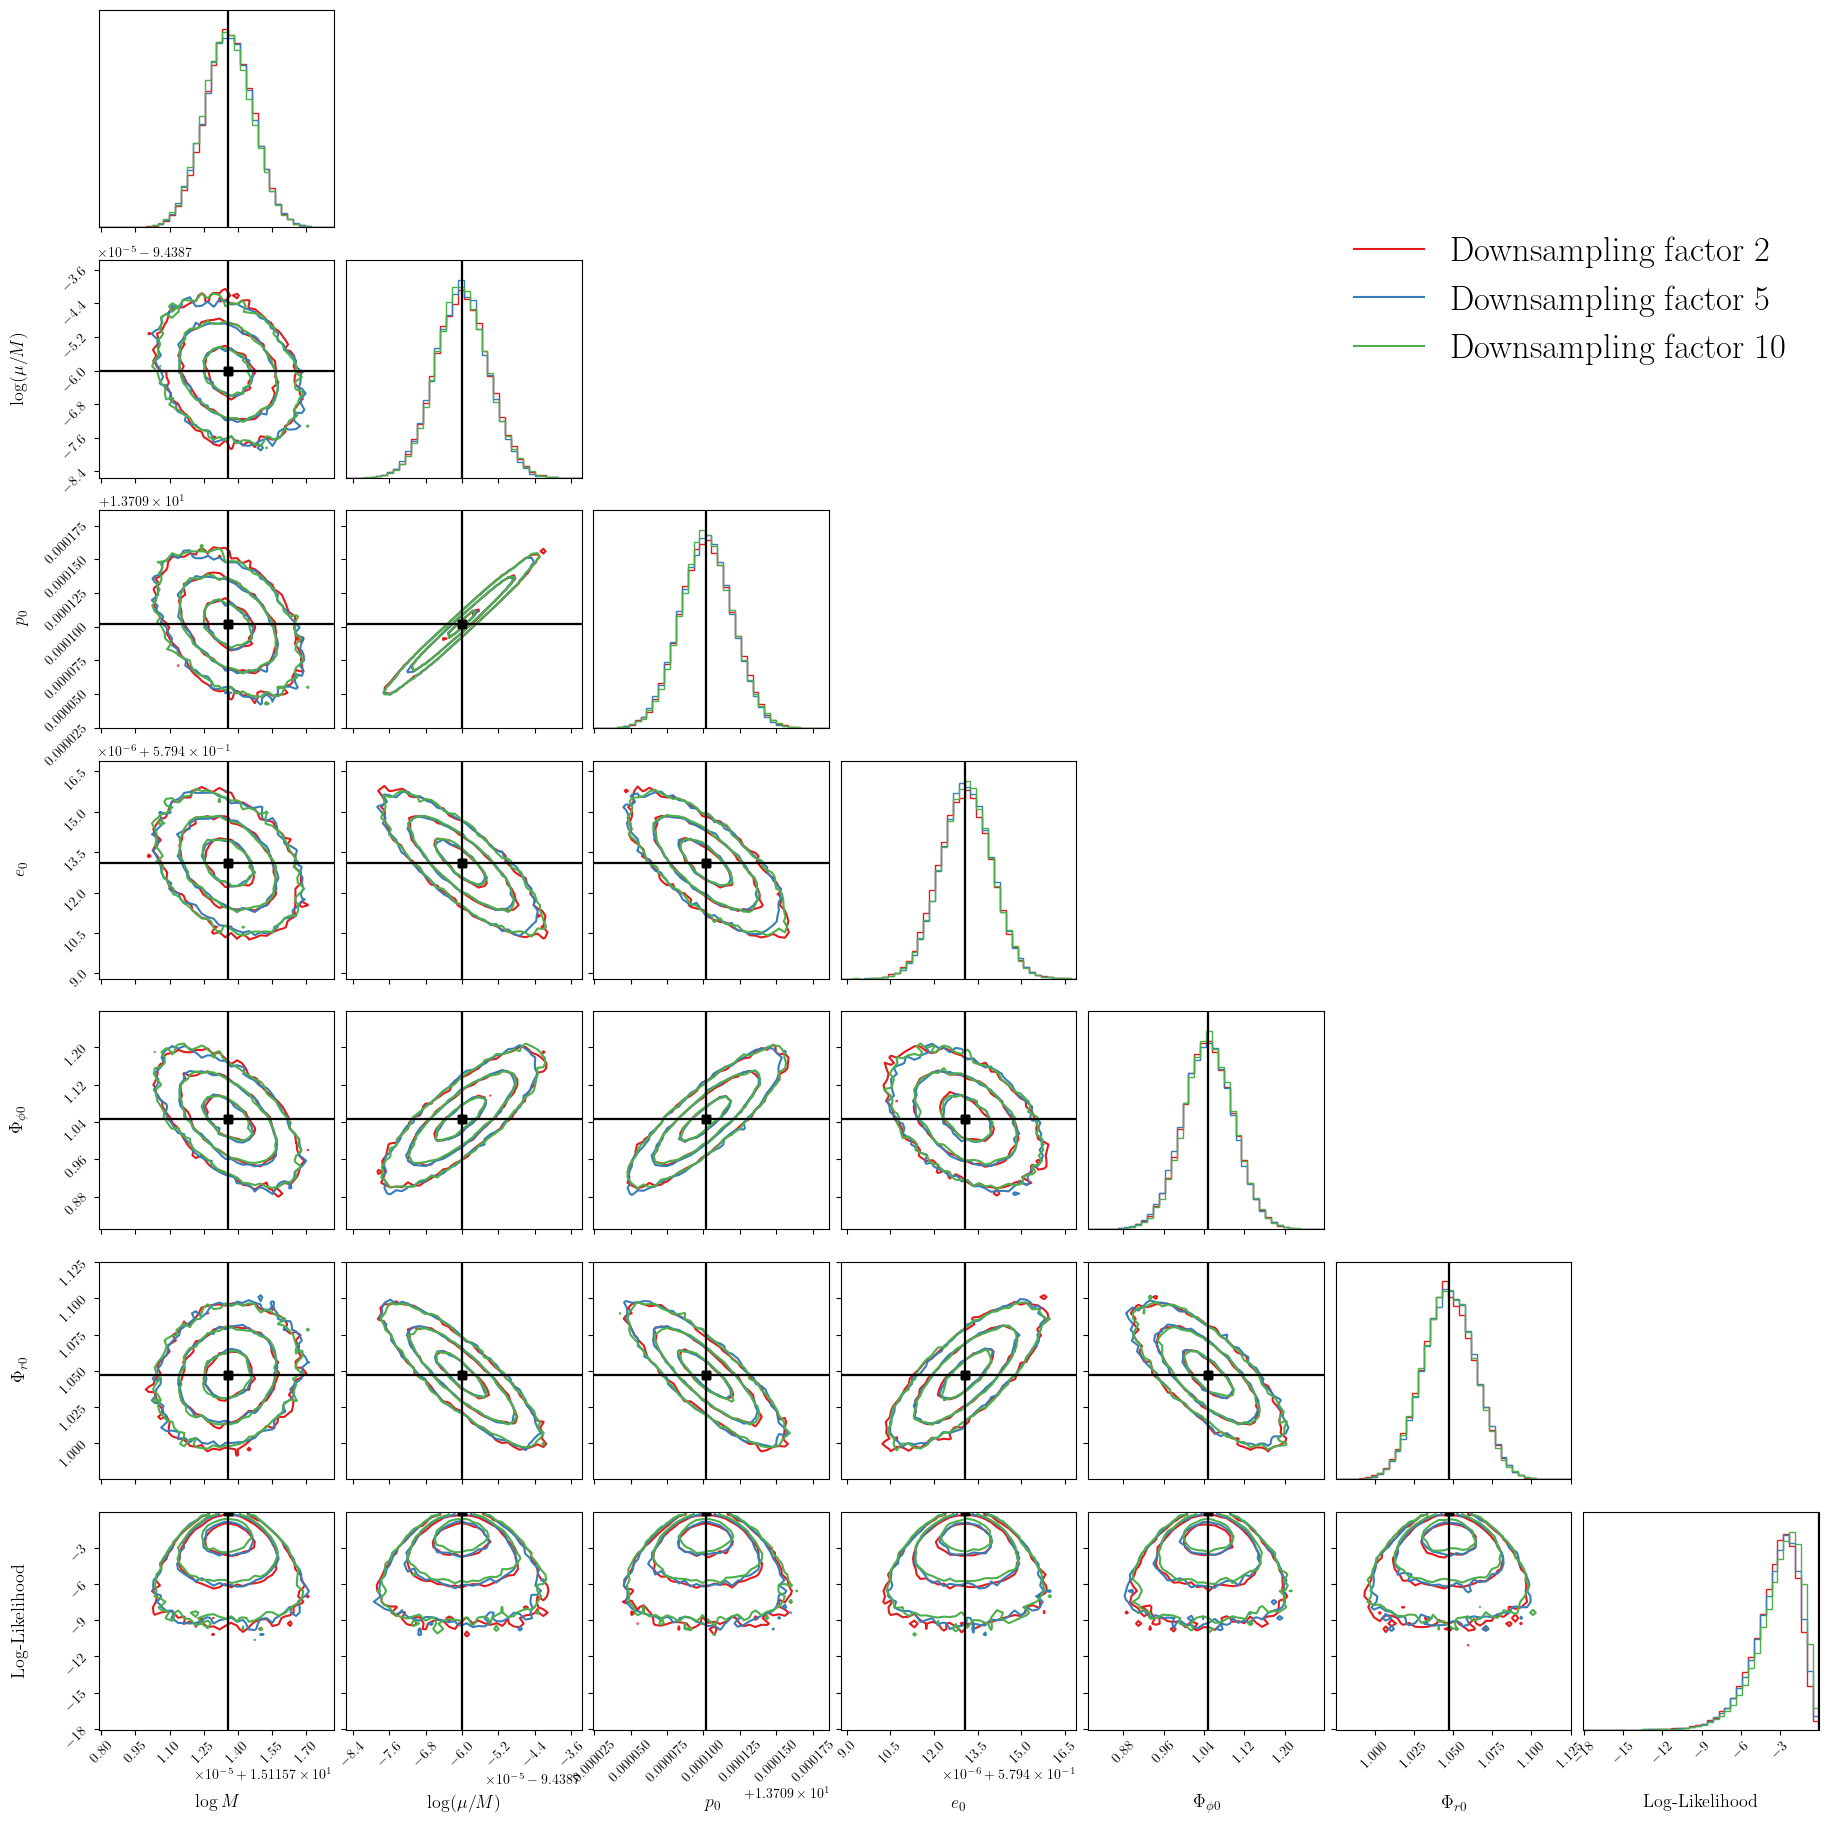

In [191]:
overlaid_corner(samp_final, [f'Downsampling factor {ii}' for ii in [2,5,10]], name_save='figures/downsampling_posterior_comparison_intrinsic')
